## Stochastic Demography
### Exercise 4

- <a href='#1'>1</a>
- <a href='#2'>2</a>
- <a href='#3'>3</a>
- <a href='#4'>4</a>

In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sb
import matplotlib.pyplot as plt 
from scipy.optimize import curve_fit
from scipy.integrate import quad

## 1
<a id = '1'></a>

$$\log\mu(t) = 0.7(t - 20) - 7 \quad \Longleftrightarrow \quad \mu(t) = e^{0.7(t - 20) - 7}, \quad t\geq 20$$

$$l(x) = \exp \biggl(-\int_0^x \mu(y)dy \biggr)
       = \exp \biggl(-\int_0^x e^{0.7(t-20) - 7}dt \biggr)$$
       
  $$   = \exp \biggl( \left[ \frac{1}{0.7} e^{0.7(t-20) - 7} \right]_0^x\biggr)
       = \exp \biggl( \frac{\mu(x) - \mu(0) }{0.7} \biggr)$$

$$ e_{20} = \frac{1}{l(20)} \int_{20}^{\infty} \exp \biggl({-\frac{\mu(x)}{0.7}} \biggr)dx
          = \frac{1}{l(20)} \int_{20}^{\infty} \exp \biggl({-\frac{e^{0.7(t - 20) - 7}}{0.7}} \biggr)dx
          = 8.679029638464044$$
          
$$l_{20} = 0.9986981606899618$$

In [4]:
def mu(x):
    return np.exp(0.7 * (x - 20) - 7)

def integrand(x):
    return np.exp(- mu(x) / 0.7)

integ = quad(mu, 0, 20)[0]
l20 = np.exp(-integ)
l20

e20 = 1 / l20 * quad(integrand, 0, 1000)[0]
e20


0.9986981606899618

28.703237563332397

## 2
<a id='2'></a>
Miss F and Mr M marry today. They are 26 and 28 years old, respectively. Using the
available female and male life tables for 2015, calculate the probability that the wife outlives
her husband.

$A_f$ death time of F

$A_m$ death time of M

$$\sum_{k=0}^{81} P(A_{f} > 26 + k \mid A_{f}> 25)P(A_{m} = 28 + k \mid A_{m}>27) \\=  
\sum_{k=0}^{81} \frac{l_f(27 + k)}{l_f(26)} \biggl(\frac{l_m(28 + k) - l_m(29 + k)}{l_m(28)}\biggr)$$


In [5]:
df = pd.read_excel('/home/oscar/Dropbox/StochasticDemography/data/life_table_fin2015_male_female.xlsx')
df = df.iloc[:, :10]

df_male = df.iloc[250:362,:]
df_female = df.iloc[136:247, :]
df_male.columns = df.iloc[249,:]
df_female.columns = df.iloc[135, :]
df_male.columns.set_names('male',inplace=True)
df_female.columns.set_names('female',inplace=True)
df_female.index = range(len(df_female))
df_male.index = range(len(df_male))

df_male.head()
df_male.tail()
df_female.head()
df_female.tail()

male,Year,age x,m(x),q(x),a(x),l(x),d(x),L(x),T(x),e(x)
0,2015,0,0.00159,0.00159,0.15,100000,159,99864,7862257,78.62
1,2015,1,0.00013,0.00013,0.5,99841,13,99835,7762393,77.75
2,2015,2,0.00023,0.00023,0.5,99828,23,99816,7662558,76.76
3,2015,3,6e-05,6e-05,0.5,99805,6,99802,7562742,75.78
4,2015,4,6e-05,6e-05,0.5,99799,6,99795,7462940,74.78


male,Year,age x,m(x),q(x),a(x),l(x),d(x),L(x),T(x),e(x)
106,2015,106,0.69376,0.51508,0.5,21,11,16,30,1.4
107,2015,107,0.72263,0.53083,0.5,10,6,8,14,1.35
108,2015,108,0.74975,0.54532,0.5,5,3,4,6,1.31
109,2015,109,0.77506,0.55859,0.5,2,1,2,3,1.27
110,2015,110+,0.79849,1,1.25,1,1,1,1,1.25


female,Year,age x,m(x),q(x),a(x),l(x),d(x),L(x),T(x),e(x)
0,2015,0,0.00178,0.00178,0.15,100000,178,99848,8419059,84.19
1,2015,1,4e-05,4e-05,0.5,99822,4,99821,8319211,83.34
2,2015,2,3e-05,3e-05,0.5,99819,3,99817,8219390,82.34
3,2015,3,0.0001,0.0001,0.5,99815,10,99810,8119573,81.35
4,2015,4,7e-05,7e-05,0.5,99805,7,99802,8019763,80.35


female,Year,age x,m(x),q(x),a(x),l(x),d(x),L(x),T(x),e(x)
106,2015,106,0.6878,0.5118,0.5,72,37,53,101,1.4
107,2015,107,0.72064,0.52976,0.5,35,19,26,47,1.35
108,2015,108,0.75127,0.54613,0.5,16,9,12,21,1.3
109,2015,109,0.77957,0.56093,0.5,7,4,5,9,1.26
110,2015,110+,0.80549,1,1.24,3,3,4,4,1.24


In [6]:
lf = df_female['l(x)'].values
lm = df_male['l(x)'].values

p = 0
af = 26
am = 28

for k in range(110 - max(am, af)):
    p += lf[af + k + 1] / lf[af] * (lm[am + k] - lm[am + 1 + k]) / lm[am]

print("probability: ", p)

probability:  0.6728284593186915


## 3 
<a id='3'></a>
Using the same lifetable, calculate separately for husband and wife a fair contribution to a
pension fund paying one euro a year from age 66 to death. It is assumed that both husband
and wife start working now and continue working until age 65. An interest rate of 2% is
assumed.

Let
- payments start = $w$
- working years = $n$
- pension starts = $p$
- payment yearly = $c$
- interest rate = 2% = $r$

Expected value of payments is
$$E(payments) = c\sum_{k=0}^{n} \left(\frac{1}{1 + r} \right)^k \frac{l(k + w)}{l(w)}$$

Expected value of pension income is 

$$E(pension) =  \sum_{k=0}^{\infty} \left(\frac{1}{1 + r} \right)^{k + p} \frac{l(k + p)}{l(w)}$$
Thus
$$c = \frac{E(pension)}{E(income)}$$


In [10]:
age_f, age_m = 26, 28
rate = 0.02

age_ret = 65
age_pen = 66

lf = df_female['l(x)']
lm = df_male['l(x)']

def expected_payments(age, start, end, rate, ls):
    val = 0
    k = 0
    for l in ls[start : end + 1]:
        val += (1 + rate)**-k * l
        k += 1
    
    return val / ls[age]

def expected_income(age, start, rate, ls):
    val = 0
    k = 0
    for l in ls[start :]:
        val += (1 + rate)**(-k - start) * l
        k += 1
    return val / ls[age]

def calc_fair_payment(age, age_w, age_ret, age_pen, rate, ls):
    e_paym = expected_payments(age, age_w, age_ret, rate, ls)
    e_inc = expected_income(age, age_pen, rate, ls)
    print("Expected value of payments: c * {0}\nExpected value of income: {1}\n".format(e_paym, e_inc))
    return e_inc / e_paym

payment_f = calc_fair_payment(age_f, age_f, age_ret, age_pen, rate, lf)
print("The woman should pay: {0}\n".format(payment_f))

payment_m = calc_fair_payment(age_m, age_m, age_ret, age_pen, rate, lm)
print("The man should pay: {0}".format(payment_m))


Expected value of payments: c * 27.52015868086169
Expected value of income: 4.298210251713131

The woman should pay: 0.15618406498150864

Expected value of payments: c * 26.135702516427767
Expected value of income: 3.395209817366125

The man should pay: 0.12990696596856516


In [158]:
lf[28]

99468

## 4
<a id='4'></a>

Looking at the graphs of age-specic fertility it seems that the curve could be well approx-
imated by

$$ c \exp(-\frac{(x − 30)^2}{2σ^2})$$

for some suitable c and $\sigma$. Referring to Exercise 9/12.4., redo the exercise using the above
approximation instead of the real age-specific fertility. (You need to estimate c and $\sigma$ from
the data, however.)

In [12]:
df_fer = pd.read_excel('/home/oscar/Dropbox/StochasticDemography/data/FinlFert39-15.xlsx',index=False, skiprows=2)
df_fer = df_fer[df_fer['Year'] == 2015].reset_index()
df_fer.iloc[0, 2] = 12
df_fer.iloc[43, 2] = 55
df_fer.head(10)
df_fer.tail(10)

,index,Year,Age,ASFR
0,3344,2015,12,0.00000
1,3345,2015,13,0.00000
2,3346,2015,14,0.00021
3,3347,2015,15,0.00021
4,3348,2015,16,0.00117
5,3349,2015,17,0.00412
6,3350,2015,18,0.00686
7,3351,2015,19,0.01757
8,3352,2015,20,0.02768
9,3353,2015,21,0.03622


,index,Year,Age,ASFR
34,3378,2015,46,0.00100
35,3379,2015,47,0.00039
36,3380,2015,48,0.00025
37,3381,2015,49,0.00003
38,3382,2015,50,0.00008
39,3383,2015,51,0.00000
40,3384,2015,52,0.00000
41,3385,2015,53,0.00000
42,3386,2015,54,0.00000
43,3387,2015,55,0.00000


In [13]:
df_mor = pd.read_excel('/home/oscar/Dropbox/StochasticDemography/data/FinlMort65-15.xlsx',index=False)
df_mor = df_mor.iloc[:,:10]
df_mor = df_mor[df_mor['year'] == 2015].reset_index()
df_mor.head()
df_mor.tail()

,index,year,age_x,m(x),q(x),a(x),l(x),d(x),L(x),T(x),e(x)
0,5550,2015,0,0.00168,0.00168,0.15,100000,168,99856,8143956,81.44
1,5551,2015,1,0.00009,0.00009,0.50,99832,9,99828,8044099,80.58
2,5552,2015,2,0.00013,0.00013,0.50,99823,13,99817,7944272,79.58
3,5553,2015,3,0.00008,0.00008,0.50,99810,8,99806,7844455,78.59
4,5554,2015,4,0.00006,0.00006,0.50,99802,6,99799,7744649,77.60


,index,year,age_x,m(x),q(x),a(x),l(x),d(x),L(x),T(x),e(x)
106,5656,2015,106,0.68827,0.51205,0.50,50,26,38,71,1.40
107,5657,2015,107,0.72078,0.52983,0.50,25,13,18,33,1.35
108,5658,2015,108,0.75118,0.54608,0.50,12,6,8,15,1.30
109,5659,2015,109,0.77932,0.56080,0.50,5,3,4,7,1.27
110,5660,2015,110+,0.80513,1.00000,1.24,2,2,3,3,1.24


In [14]:
def f(x, c, s2):
    return c * np.exp(-((x - 30) ** 2) / (2* s2))

xdata = df_fer['Age'].values
ydata = df_fer['ASFR'].values
popt, pcov = curve_fit(f, xdata, ydata)

c, s2 = popt[0], popt[1]

print("c: {0:.7f}\ns^2: {1:.7f}".format(c, s2))

c: 0.1186553
s^2: 31.5332067


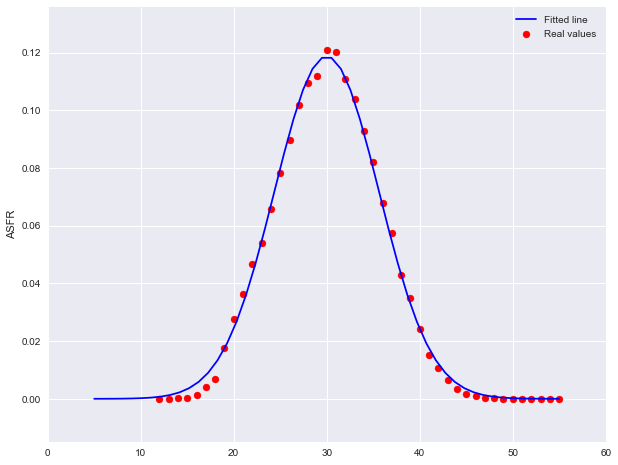

In [15]:
xline = np.linspace(5,55)
yline = f(xline, popt[0], popt[1])

sb.set()
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(df_fer.Age, df_fer.ASFR, label='Real values', c='r')
ax.plot(xline, yline, label='Fitted line', c='b')
ax.set_ylabel('ASFR')
ax.legend(loc='best')
ax.grid(True)
ax.set_xticks(ax.get_xticks()[::1]);

The ASFR-column is the f-values in the Leslie-Matrix, that is the upper row.

The lower diagonal contains the probabilities $s_x$ for survival into the next state.

$$s_x = \frac{l_{x+1}}{l_{x}}$$

In [16]:
L = df_mor['l(x)'].values
S = L[1:] / L[0:-1]
size = len(L)
size

111

There are as many states as there are ages. So the Leslie-Matrix will be a 111 by 111 matrix.

In [17]:
A = np.zeros([size, size])

A[np.arange(size-1) + 1, np.arange(size-1)] = S

fs = f(np.arange(12, 51), c, s2) 

Fs = fs * (1 - df_mor.loc[11:49, 'q(x)'].values) / 2.05

A_old = A.copy()
upper_row = df_fer['ASFR'].values * (1 - df_mor.loc[11:54, 'q(x)'].values) / 2.05

A_old[0, 11:len(upper_row) + 11] = upper_row

A[0, 11:50] = Fs



In [183]:
Fs.shape
fs.shape
A.shape
A_old.shape

(39,)

(39,)

(111, 111)

(111, 111)

In [18]:
r, c = 8,6
print("Upper left \n{}\n".format(A[:r,: c]))
print("Upper right \n{}\n".format(A[:r, -c:]))

print("Lower left \n{}\n".format(A[-r:, :c]))
print("Lower right \n{}\n".format(A[-r:, -c:]))

print("Upper row estimated Leslie\n{}\n".format(A[0, 12:55]))
print("Upper row true Leslie \n{}\n".format(A_old[0, 12:55]))


Upper left 
[[0.         0.         0.         0.         0.         0.        ]
 [0.99832    0.         0.         0.         0.         0.        ]
 [0.         0.99990985 0.         0.         0.         0.        ]
 [0.         0.         0.99986977 0.         0.         0.        ]
 [0.         0.         0.         0.99991985 0.         0.        ]
 [0.         0.         0.         0.         0.99992986 0.        ]
 [0.         0.         0.         0.         0.         0.99991984]
 [0.         0.         0.         0.         0.         0.        ]]

Upper right 
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]

Lower left 
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]

Lower right 
[[0.         0.         0.         0.         0.        

In [19]:
eig_est = np.linalg.eigvals(A)

eig_real_est = [x.real for x in eig_est if x.imag==0 and x.real !=0]

print("The real valued eigenvalues: ", eig_real_est)

The real valued eigenvalues:  [0.9928788224168148, -0.8161598650439827]


In [20]:
eig = np.linalg.eigvals(A_old)

eig_real = [x.real for x in eig if x.imag==0 and x.real !=0]
eig_dom_old = np.max(np.abs(eig_real))
print("Old values")
print("The real valued eigenvalues: ", eig_real)

Old values
The real valued eigenvalues:  [0.9925018556519376, -0.7925573197510908]


In [21]:
eig_dom_old

0.9925018556519376

## 5

Consider a Leslie matrix A. Assume that the fertility figures $f_x$ are halved. Estimate the
effect on $\lambda$ , the dominant eigenvalue of A.

In [22]:
A_half = A_old.copy()
A_half[0,:] *= .5
eig_half = np.linalg.eigvals(A_half)
eig_real_half = [x.real for x in eig_half if x.imag==0 and x.real !=0]
eig_dom_half = np.max(np.abs(eig_real_half))
print("The real valued eigenvalues: ", eig_real_half)

The real valued eigenvalues:  [0.9702784409646839, -0.7887221619638507]


In [25]:
1 - eig_dom_half / eig_dom_old

0.02239130794637756

The domant eigenvalue decreases by 2.2 %.

## 6
Consider a Leslie matrix A. Assume that the mortalities (death probabilities) $q_x$ decrease
by a factor of 0.01 for all x . Estimate the effect on $\lambda$ , the dominant eigenvalue of A .

In [ ]:
A_new = A_old.copy()
A_new[1:, :] = A_new[1:, :] * 0